## 머신러닝 시스템 워크플로우
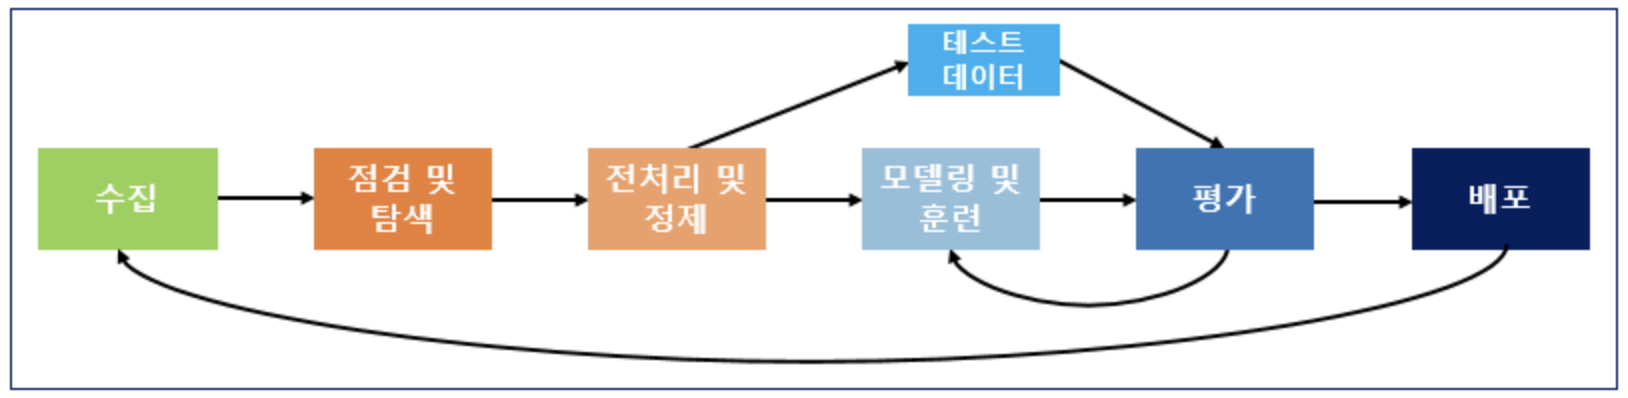
- 수집
> 머신러닝 학습에 필요한 데이터 수집
- 점검 및 탐색
> 수집한 데이터의 구조, 노이즈 등 파악   
> 탐색적 데이터 분석(EDA) 단계라고도 함
- 전처리 및 정제
> 머신러닝 학습에 알맞게 데이터 정제 및 전처리를 하는 과정
- 모델링 및 훈련
> 적절한 머신러닝 알고리즘을 선택 및 전처리가 완료된 데이터를 이용하여 머신러닝 학습을 진행하는 단계
- 평가
> 제작한 모델을 테스트 데이터를 통해 학습 평가를 진행   
> 평가가 좋지 않으면, 다시 머신러닝 학습을 진행한다.
- 배포
> 성공적으로 훈련이 된 것으로 판단된다면, 완성된 모델을 서비스에 적용하기 위하여 운영 배포를 진행한다.   
> 운영 배포를 하면서 사용자가 입력하는 데이터를 함께 수집하여 다시 모델 학습에 이용할 수 있다.

## 머신러닝 알고리즘 분류
- 기계학습   
  - 지도학습   
    > 레이블된 데이터로 학습   
    > 모델에 주입하는 데이터에 입력값(Feature)과 출력값(Target)을 같이 넣어 학습시키는 방식   
    - 분류   
      > MNIST 필기체 인식   
      > 스팸메일 분류   
    - 회귀   
      > 주가 예측   
  - 비지도학습   
    > 레이블 없이 학습   
    > 모델에 입력값(Feature)만 넣어서 학습시키는 방식   
    > 데이터의 숨겨진 구조/특징 발견   
    - 군집   
    - 차원 축소   
    - 연관 규칙   
  - 강화학습   
    > 보상 시스템으로 학습   
    > 모델에 학습 결과에 따라 보상 또는 벌점을 주어 가장 큰 보상을 받는 방향으로 학습을 시키는 방식

## 머신러닝 기본 용어

- Feature
    > 독립변수, 설명변수   
    > 학습데이터의 특성
- Label, Target, Class
    > 종속변수   
    > 정답 데이터
- Parameter
    > 모델이 학습과정에서 업데이트하는 파라미터
- Hyper parameter
    > 사용자가 직접 세팅하는 파라미터
- Loss
    > 손실   
    > 정답값과 예측값의 오차를 표현하는 지표
- Metric
    > 평가 지표   
    > 모델의 성능을 평가할 때 사용하는 지표

# Scikit-learn

## 자주 사용하는 사이킷런 모듈

- 데이터 정제(Data Cleansing) & 속성 공학(Feature Engineering)
  - sklearn.preprocessing: 데이터 전처리(인코딩, 정규화 등)
  - sklearn.feature_selection: 특성 선택
  - sklearn.feature_extraction: 특성 추출(아미지나 텍스트에서 속성 추출)
- 모델 성능 평가와 개선
  - sklearn.model_selection: 데이터 분리, 하이퍼 파라미터 튜닝
  - sklearn.metrics: 성능평가
- 지도학습(Supervised Learning)
  - sklearn.ensemble: 앙상블 
  - sklearn.linear_model: 선형모델
  - sklearn.tree: 의사결정나무
- 비지도학습(Unsupervised Learning)
  - sklearn.cluster: 군집분석
  - sklearn.decomposition: 차원축소
- 유틸리티와 데이터 세트
  - sklearn.pipeline: 워크플로우 파이프라인
  - 예제 데이터 세트
- 사이킷런 알고리즘 명명규칙
  - 분류 알고리즘명: OOClassifier
  > ex) DecisionTreeClassifier
  - 회귀 알고리즘명: OORegressor
  > ex) DecisionTreeRegressor

# 머신러닝 워크플로우

## 데이터 수집(또는 데이터 로드)

In [4]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

In [5]:
dir(breast_cancer)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
print(breast_cancer.DESCR) # 데이터 설명

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## 데이터 점검 및 탐색

In [9]:
import numpy as np
import pandas as pd

In [10]:
df_cancer = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df_cancer['target'] = breast_cancer['target']
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
df_cancer.describe() # 모든 데이터가 number형이므로 (object가 없으므로) describe로 해석 가능

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## 전처리 및 정제

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [13]:
# standardization
scaler = StandardScaler()
scaled = scaler.fit_transform(df_cancer.drop('target', axis=1))

In [14]:
df_cancer.shape, scaled.shape

((569, 31), (569, 30))

In [15]:
scaled[-1:,:]

array([[-1.80840125,  1.22179204, -1.81438851, -1.34778924, -3.11208479,
        -1.15075248, -1.11487284, -1.26181958, -0.8200699 , -0.56103238,
        -0.07027874,  0.3830925 , -0.15744905, -0.46615196,  0.04934236,
        -1.16351619, -1.05750068, -1.91344745,  0.75282996, -0.382754  ,
        -1.41089258,  0.76418957, -1.43273495, -1.07581292, -1.85901852,
        -1.2075525 , -1.30583065, -1.74506282, -0.04813821, -0.75120669]])

In [16]:
# train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(scaled, df_cancer['target'], random_state=10)
list(map(lambda x: x.shape, [x_train, x_valid, y_train, y_valid]))

[(426, 30), (143, 30), (426,), (143,)]

## 모델링 및 훈련

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
# logistic regression 모델 선택
lr_clf = LogisticRegression()
# 훈련
lr_clf.fit(x_train, y_train)
# LogisticRegression().fit(train_feature_data, train_target_data)

LogisticRegression()

## 평가

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
# test 데이터를 넣어서 예측 | LogisticRegression().predict(test_feature_data)
pred = lr_clf.predict(x_valid)
# 정확도 측정 | accuracy_score(test_target_data)
accuracy_score(y_valid, pred)

0.958041958041958

In [23]:
acc = 0
for x_idx, x in enumerate(pred):
  for y_idx, y in enumerate(y_valid):
    if x_idx == y_idx:
      if x == y:
        acc += 1
print(acc, len(pred), acc*100/len(pred))

137 143 95.8041958041958


In [24]:
tmp = pd.concat([pd.Series(pred), pd.Series(y_valid.to_numpy())], axis=1)

In [48]:
# pandas로 옆에 붙여보고 둘이 비교하여 같은지 다른지 여부를 옆에 Column으로 붙여보기
tmp[2] = [1 if x[0] == x[1] else 0 for x in tmp.values]

In [53]:
tmp.head()

,0,1,2
0,0,0,1
1,1,1,1
2,1,1,1
3,0,0,1
4,1,1,1


In [54]:
tmp[2].value_counts()

1    137
0      6
Name: 2, dtype: int64

In [55]:
# 다른 모델로 풀어보기
from sklearn.linear_model import SGDClassifier

In [56]:
clf = SGDClassifier(loss="modified_huber", penalty="l2", max_iter=1000)
clf.fit(x_train, y_train)

SGDClassifier(loss='modified_huber')

In [57]:
cl_pred = clf.predict(x_valid)

In [58]:
accuracy_score(y_valid, cl_pred)

0.958041958041958

# Overfitting 문제

In [59]:
import seaborn as sns
df = sns.load_dataset('titanic')

In [60]:
cols = ["age", "sibsp", "parch", "fare"]
features = df[cols]
target = df['survived']

In [61]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [62]:
cols = ["pclass", "sex", "embarked"]
enc = OneHotEncoder()
tmp = pd.DataFrame(enc.fit_transform(df[cols]).toarray(), columns=enc.get_feature_names_out())
features = pd.concat([features, tmp], axis=1)
features.head()

,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,embarked_nan
0,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,26.0,0,0,7.9250,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,35.0,1,0,53.1000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [63]:
features.age = features.age.fillna(-1)
features.isnull().sum().sum()

0

In [64]:
SEED = 42

x2_train, x2_valid, y2_train, y2_valid = train_test_split(features, target, random_state=SEED, test_size=0.2)
x2_train.shape, x2_valid.shape, y2_train.shape, y2_valid.shape

((712, 13), (179, 13), (712,), (179,))

## 모델 복잡도에 따른 overfitting 예제

In [65]:
from sklearn.tree import DecisionTreeClassifier
SEED = 42

model = DecisionTreeClassifier(max_depth=20, random_state=SEED)
model.fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_valid, y_valid)

(1.0, 0.9300699300699301)

## 모델 복잡도를 줄인 예제

In [66]:
model = DecisionTreeClassifier(max_depth=3, random_state=SEED)
model.fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_valid, y_valid)

(0.9624413145539906, 0.9370629370629371)